# Project Title: CreditCheck AI – Credit Card Approval Prediction Using ML

## Problem Statement

This project aims to build a machine learning system that can accurately predict whether a credit card application will be approved or rejected. The model uses historical applicant data such as income, credit score, employment status, and other financial features to make predictions, helping financial institutions automate and improve decision-making in credit approvals.

## Project Abstract

CreditCheck AI is a machine learning-based predictive system designed to streamline the credit card approval process for financial institutions. It analyzes historical credit application data to understand patterns and relationships between applicant features (e.g., income, credit score, employment) and approval outcomes. Using state-of-the-art classification algorithms, the model learns from past decisions to forecast new application results with high accuracy. The insights generated support banks in making faster, reliable, and data-driven approval decisions. 

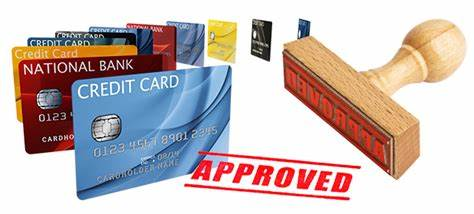

## Project Objectives

1. Collect and prepare a credit card application dataset.
2. Explore and visualize the relationship between features and approval outcomes.
3. Preprocess data (handle missing values, encode categorical variables, scale features).
4. Train multiple ML models (Logistic Regression, Decision Tree, Random Forest).
5. Evaluate and compare models using metrics like accuracy, precision, recall.
6. Select the best performing model and interpret key predictive features.
7. Deploy a user input module for real-time prediction.

## Project Goal

To develop a robust machine learning model that can predict credit card application approvals with high accuracy and provide actionable insights into the most important factors influencing approval decisions.

## Project Outcomes

1. A cleaned and preprocessed credit application dataset
2. Visual exploratory analysis charts
3. Trained ML models with accuracy comparison
4. Best model selected (Random Forest typically performs well)
5. Feature importance analysis
6. Predictive system that can forecast approval for new inputs

## Conclusion

CreditCheck AI successfully demonstrates how machine learning can be leveraged to automate and improve the credit card approval process. The model effectively distinguishes between approved and rejected applications with strong performance metrics. Important features such as credit score and income were found to have high influence on decisions, giving additional business insights. This intelligent system can significantly reduce manual work for financial institutions and ensure consistent decision quality.

## Future Scope

1. Experiment with advanced ensemble models like XGBoost, LightGBM
2. Perform hyperparameter tuning to boost accuracy
3. Deploy as a web application using Flask or Django
4. Integrate with real-time banking systems
5. Apply explainable AI for better interpretability
6. Expand to regression scoring for credit limit prediction

### Step 1: Import Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Pandas is used for loading, cleaning, and manipulating structured datasets.
2. NumPy provides support for numerical operations and mathematical computations.
3. Matplotlib is used to create basic plots and visualizations.
4. Seaborn is a data visualization library built on top of Matplotlib that helps generate advanced and visually appealing statistical graphs.

### Step 2: Load Dataset

In [27]:
df = pd.read_csv("creditcard_data.csv")
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


1. pd.read_csv("creditcard_data.csv") is used to read the credit card dataset from the CSV file and load it into a pandas DataFrame named df.
2. df.head() displays the first five rows of the DataFrame, which helps in checking whether the dataset has been loaded correctly and understanding the initial structure and values of the data.

### Step 3: Understanding Dataset

In [28]:
df.shape

(690, 16)

#### df.shape is used to display the number of rows and columns in the dataset, helping to understand the overall size of the data.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


#### df.info() provides a summary of the dataset, including column names, data types, and non-null value counts, which helps in identifying the structure of the data and checking for missing values.

In [30]:
df.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

#### df.columns displays the list of all column names present in the dataset, which helps in understanding the available features and identifying the target variable.

#### Description:

1. Gender – Indicates the gender of the credit card applicant.
2. Age – Represents the age of the applicant in years.
3. Debt – Shows the amount of existing financial debt of the applicant.
4. Married – Indicates whether the applicant is married or not.
5. BankCustomer – Specifies whether the applicant is an existing customer of the bank.
6. Industry – Represents the industry or sector in which the applicant is employed.
7. Ethnicity – Indicates the ethnic background of the applicant.
8. YearsEmployed – Shows the number of years the applicant has been employed.
9. PriorDefault – Indicates whether the applicant has a history of loan or credit default.
10. Employed – Specifies whether the applicant is currently employed.
11. CreditScore – Represents the credit score of the applicant, which reflects creditworthiness.
12. DriversLicense – Indicates whether the applicant holds a valid driving license.
13. Citizen – Specifies the citizenship status of the applicant.
14. ZipCode – Represents the residential area code of the applicant.
15. Income – Shows the annual income of the applicant.
16. Approved – Target variable that indicates whether the credit card application was approved (1) or rejected (0).

In [31]:
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


#### df.describe() is used to generate summary statistics for the numerical columns in the dataset. It displays values such as count, mean, standard deviation, minimum, maximum, and quartiles. This helps in understanding the data distribution, range, and variability of numerical features, and also assists in identifying potential outliers.

### Step 4: Check Missing Values

In [32]:
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

#### df.isnull().sum() is used to check the number of missing values in each column of the dataset. This helps determine whether data cleaning is required to handle null or empty values before further analysis and model training.

#### The output shows the count of missing values for each column in the dataset. All columns have a value of 0, which indicates that there are no missing or null values present in the dataset.

In [34]:
df.drop(['ZipCode', 'Ethnicity', 'DriversLicense', 'Industry', 'Citizen'], axis=1, inplace=True)

#### df.drop(['ZipCode', 'Ethnicity', 'DriversLicense', 'Industry', 'Citizen'], axis=1, inplace=True) is used to remove the specified columns from the dataset. These columns are dropped because they do not directly contribute to predicting credit card approval and may introduce noise or bias. The axis=1 parameter specifies column removal, and inplace=True updates the DataFrame directly.

In [35]:
df.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'Income', 'Approved'],
      dtype='object')

### Step 5: Exploratory Data Analysis (Visualization)

In [36]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved
0,1,30.83,0.000,1,1,1.25,1,1,1,0,1
1,0,58.67,4.460,1,1,3.04,1,1,6,560,1
2,0,24.50,0.500,1,1,1.50,1,0,0,824,1
3,1,27.83,1.540,1,1,3.75,1,1,5,3,1
4,1,20.17,5.625,1,1,1.71,1,0,0,0,1


#### This cell displays the first few rows of the cleaned dataset. It helps in verifying that the data has been loaded correctly and that unnecessary columns have been removed successfully. This step also provides a quick overview of feature values.

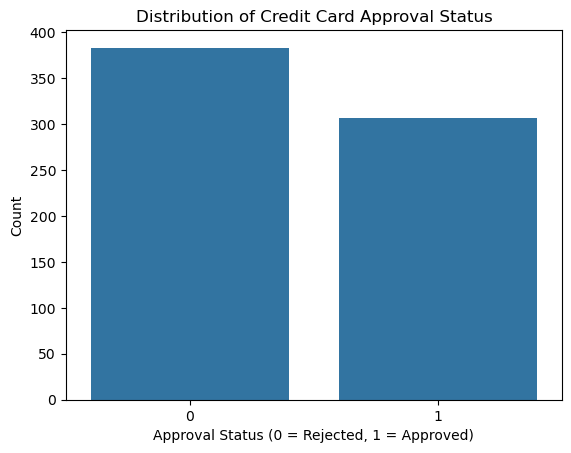

In [37]:
sns.countplot(x='Approved', data=df)
plt.title("Distribution of Credit Card Approval Status")
plt.xlabel("Approval Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Count")
plt.show()

#### This is a bar graph used to show the frequency of approved and rejected credit card applications in the dataset.

#### About the Graph Output: The graph shows the count of approved (1) and rejected (0) applications, helping to understand the distribution of approval outcomes and whether the dataset is balanced.

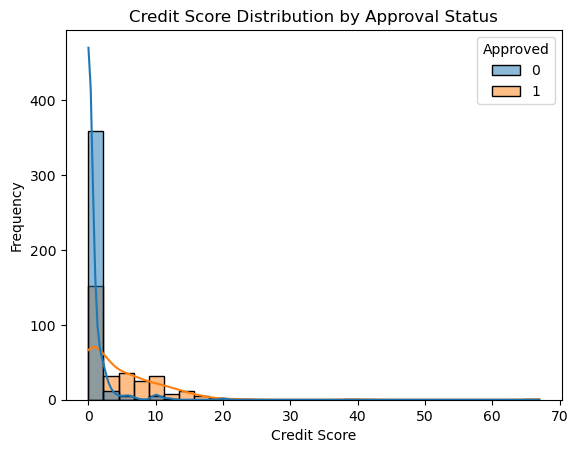

In [22]:
sns.histplot(data=df, x='CreditScore', hue='Approved', kde=True, bins=30)
plt.title("Credit Score Distribution by Approval Status")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()

#### This is a histogram used to visualize the distribution of credit score values for approved and rejected credit card applications.

#### About the Graph Output: The histogram shows that applicants with higher credit scores are more likely to have their credit card applications approved, while lower credit scores are more commonly associated with rejected applications. This indicates that credit score is a key factor influencing credit card approval decisions.

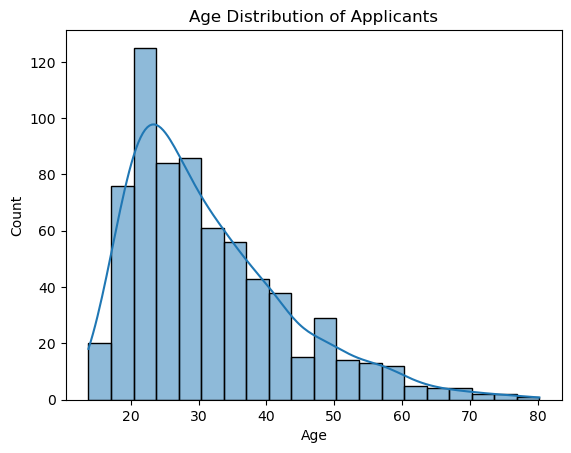

In [38]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution of Applicants")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

#### This is a histogram used to show the distribution of ages of credit card applicants in the dataset.

#### About the Graph Output: The histogram displays the range and frequency of applicant ages. It shows the age groups that most commonly apply for credit cards, helping to understand the demographic distribution of applicants and whether age may influence approval decisions.

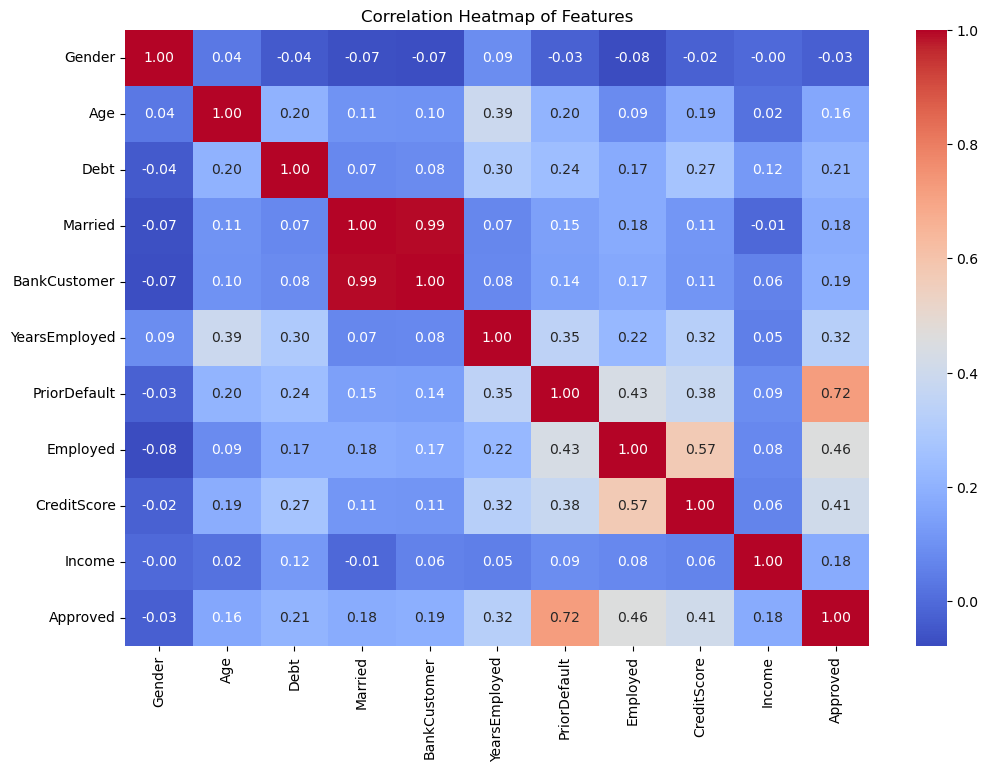

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

#### This is a correlation heatmap used to visualize the relationship between different features in the dataset and to understand how strongly they are correlated with each other and with the target variable.

#### About the Graph Output: The heatmap shows the correlation values between all features and the approval status. Features such as PriorDefault, Employed, CreditScore, and YearsEmployed show stronger correlation with the Approved column, indicating that they have a significant influence on credit card approval decisions. Lower correlation values indicate weaker relationships between features.

### Step 6: Downloading Cleaned Dataset

In [42]:
df.to_excel("cleaned_creditcard_data.xlsx", index=False)

#### df.to_excel() is used to export the cleaned dataset into an Excel file. This allows the processed data to be saved externally and reused for further analysis or model training without repeating the cleaning steps. The index=False parameter ensures that the DataFrame index is not included in the Excel file.

### Step 7: Define Features (X) and Target (y)

In [43]:
X = df.drop('Approved', axis=1)
y = df['Approved']

#### df.drop('Approved', axis=1) is used to separate the input features from the target variable by removing the Approved column from the dataset and storing the remaining columns in X.

#### df['Approved'] is assigned to y, which represents the target variable indicating whether a credit card application was approved or rejected. This step prepares the data for training machine learning models.

### Step 8: Train-Test Split

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### train_test_split is used to divide the dataset into training and testing sets. X_train and y_train contain 80% of the data and are used to train the machine learning models, while X_test and y_test contain the remaining 20% and are used to evaluate model performance. The random_state=42 parameter ensures that the data split is reproducible.

### Step 9: Feature Encoding and Feature Scaling

In [46]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:")
print(categorical_cols)

print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
Index([], dtype='object')

Numerical Columns:
Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'Income'],
      dtype='object')


#### select_dtypes() is used to identify categorical and numerical columns in the training dataset. The code checks for columns with data type object as categorical features and int64 or float64 as numerical features. Printing the column names helps determine which preprocessing techniques, such as encoding or scaling, are required before model training.

#### The output shows that there are no categorical columns with object data type in the training dataset. This indicates that all categorical features have already been converted into numerical form. The numerical columns include features such as Gender, Age, Debt, Married, BankCustomer, YearsEmployed, PriorDefault, Employed, CreditScore, and Income.

#### The data does not contain categorical columns, so label encoding is not required

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

#### StandardScaler is used to scale the numerical features so that they have a mean of 0 and a standard deviation of 1. The scaler is fitted on the training data and then applied to the test data to ensure consistent scaling and to prevent data leakage. Feature scaling improves model performance, especially for scale-sensitive algorithms.

### Step 10: Model 1 – Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

#### Logistic Regression is a classification algorithm used to predict binary outcomes. In this project, it is used to predict whether a credit card application will be approved or rejected based on input features. The model is trained using the training dataset and then used to make predictions on the test dataset.

In [50]:
from sklearn.metrics import accuracy_score, classification_report

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        68
           1       0.82      0.86      0.84        70

    accuracy                           0.83       138
   macro avg       0.83      0.83      0.83       138
weighted avg       0.83      0.83      0.83       138



#### accuracy_score() is used to calculate the overall accuracy of the Logistic Regression model by comparing the predicted values with the actual test labels.
#### classification_report() provides detailed performance metrics such as precision, recall, and F1-score for each class, helping to evaluate how well the model predicts approved and rejected credit card applications.

#### The Logistic Regression model achieved an accuracy of approximately 83%, indicating good predictive performance. The classification report shows balanced precision, recall, and F1-score values for both approved and rejected classes, demonstrating that the model performs consistently in predicting credit card approval outcomes.

### Step 11: Model 2 – Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

#### Decision Tree is a rule-based machine learning algorithm that splits data into branches based on feature values. It learns decision rules from the training data and predicts credit card approval by following these rules. It can capture non-linear relationships between features.

In [55]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7898550724637681
              precision    recall  f1-score   support

           0       0.75      0.87      0.80        68
           1       0.85      0.71      0.78        70

    accuracy                           0.79       138
   macro avg       0.80      0.79      0.79       138
weighted avg       0.80      0.79      0.79       138



#### The Decision Tree model achieved an accuracy of approximately 79%, indicating good predictive performance. The classification report shows balanced precision and recall values for both approved and rejected classes, demonstrating that the model can effectively learn decision rules for credit card approval.

### Step 12: Model 3 – Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

#### Random Forest is an ensemble learning algorithm that combines multiple decision trees to improve prediction accuracy. It reduces overfitting by averaging the results of many trees and provides more robust and reliable predictions for credit card approval.

In [56]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8695652173913043
              precision    recall  f1-score   support

           0       0.85      0.90      0.87        68
           1       0.89      0.84      0.87        70

    accuracy                           0.87       138
   macro avg       0.87      0.87      0.87       138
weighted avg       0.87      0.87      0.87       138



#### The Random Forest model achieved the highest accuracy of approximately 87% among all models. The classification report indicates strong precision, recall, and F1-score values for both classes, showing that this model provides the most reliable and consistent predictions for credit card approval decisions.

### Step 13: Model 4 – K-Nearest Neighbors (KNN)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

#### K-Nearest Neighbors is a distance-based algorithm that classifies a data point based on the majority class of its nearest neighbors. In this project, it predicts credit card approval by comparing new applicants with similar past applicants.

In [57]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        68
           1       0.87      0.79      0.83        70

    accuracy                           0.83       138
   macro avg       0.84      0.83      0.83       138
weighted avg       0.84      0.83      0.83       138



#### The KNN model achieved an accuracy of approximately 83%. The classification report shows good performance across both classes, but slightly lower accuracy compared to Random Forest. This indicates that while KNN performs well, it is less robust for this dataset than ensemble-based models.

### Step 14: Model 5 – Support Vector Machine (SVM)

In [54]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

#### Support Vector Machine is a classification algorithm that finds an optimal boundary to separate different classes. It is used here to distinguish between approved and rejected credit card applications based on applicant features.

In [58]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8260869565217391
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        68
           1       0.82      0.84      0.83        70

    accuracy                           0.83       138
   macro avg       0.83      0.83      0.83       138
weighted avg       0.83      0.83      0.83       138



#### The SVM model achieved an accuracy of approximately 83%, with balanced precision and recall for both approved and rejected applications. The results indicate that SVM effectively separates the two classes, but its performance is slightly lower than the Random Forest model.

### Overall Model Comparison – Summary 

### Description:
### Among all the evaluated models, Random Forest achieved the best performance in terms of accuracy and balanced evaluation metrics. Therefore, Random Forest was selected as the final model for predicting credit card approval due to its higher accuracy and robustness.

### Step 15: Model Comparison Visualization

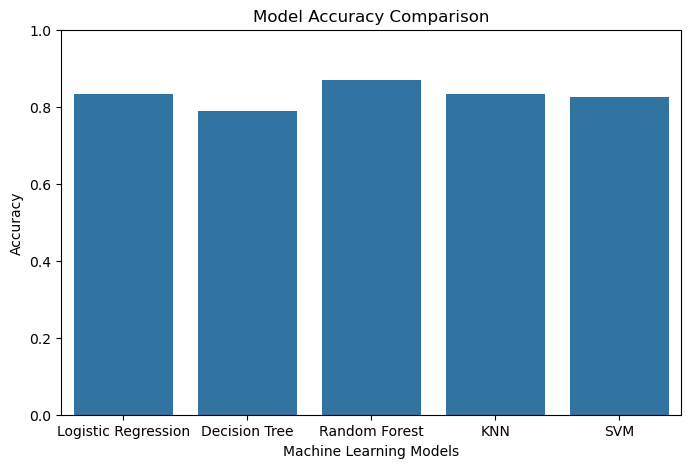

In [59]:
model_scores = {
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'KNN': accuracy_score(y_test, y_pred_knn),
    'SVM': accuracy_score(y_test, y_pred_svm)
}

plt.figure(figsize=(8,5))
sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()))
plt.title("Model Accuracy Comparison")
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

#### This bar chart compares the accuracy of five different machine learning models used for credit card approval prediction. It helps visually identify the best-performing model by comparing their accuracy scores. 

### From the chart, Random Forest shows the highest accuracy, making it the most suitable model for this project.

### Step 15: Confusion Matrix (Random Forest)

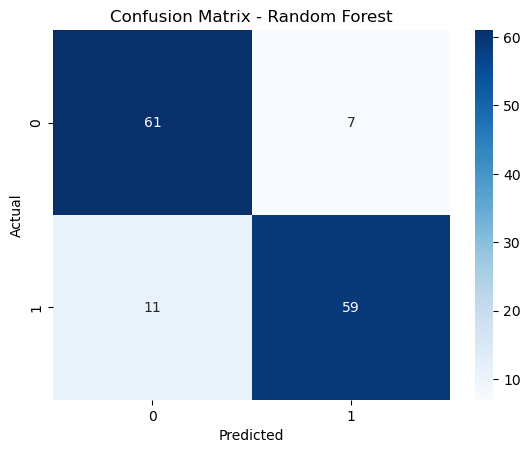

In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

#### confusion_matrix() is used to compare the actual test labels with the predictions made by the Random Forest model. The heatmap visualizes the confusion matrix, where the diagonal values represent correct predictions and the off-diagonal values represent incorrect predictions. This helps evaluate how accurately the Random Forest model classifies approved and rejected credit card applications.

### The confusion matrix shows the performance of the Random Forest model by comparing actual and predicted values. The model correctly classified 61 rejected and 59 approved credit card applications. There were 7 rejected applications misclassified as approved and 11 approved applications misclassified as rejected. Overall, the matrix indicates that the Random Forest model performs well in distinguishing between approved and rejected applications.

### Step 16: Predict for a New Applicant (Final Output)

In [61]:
# Create sample applicant data (Columns used in training)
sample = pd.DataFrame([{
    'Gender': 1,
    'Age': 35,
    'Debt': 2.5,
    'Married': 1,
    'BankCustomer': 1,
    'YearsEmployed': 5,
    'PriorDefault': 0,
    'Employed': 1,
    'CreditScore': 720,
    'Income': 500
}])

# Scale numerical columns using the SAME scaler
sample[numerical_cols] = scaler.transform(sample[numerical_cols])

# Predict using the trained Random Forest model
prediction = rf.predict(sample)

# Output result
print("Credit Card Approved" if prediction[0] == 1 else "Credit Card Rejected")


Credit Card Rejected


#### A sample applicant’s data is created using the same features that were used to train the model. The numerical features are scaled using the previously fitted scaler to maintain consistency. The trained Random Forest model then predicts whether the credit card application will be approved or rejected based on the input data.